In [1]:
import datetime
import numpy as np
import os
import pandas as pd
import urllib.request
from urllib.request import urlopen
import plotly.express as px
import json
import requests
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns
from folium import plugins
from folium.plugins import HeatMap
from scipy.stats import pearsonr
from urllib.parse import quote
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot, dates


Unfortunately, Majority of the code got deleted as we transferred the file to gitspace. This is included the updated boxplot as well as all the stastical tests. So we linked this code, just to support the evidence of there being done some analysis and apologies for not delivering the full code.
Antonio Ferrara
Cheng-Liang Lu 
Mabel-Brednda I. Okikaa 


In [2]:


def weighted_score(df):
    # Define weighting factor for number of errors
    Penalty = 5
   
    # Calculate weighted score for each row
    weighted_scores = []
    for _, row in df.iterrows():
         # Convert time object to secs
        sec = row['Time'].minute * 60 + row['Time'].second + row['Time'].microsecond / 1000000

        score = sec + row['Errors '] * Penalty
        weighted_scores.append(score)

    # Add a new column to the DataFrame with the weighted scores
    df['weighted_score'] = weighted_scores
    df['weighted Score (Minutes)'] = df['weighted_score'].apply(lambda x: x/60)
    
    return df

In [3]:
# Loading excel file 
from pandas import read_excel
df_experiment = pd.read_excel('Experiment_prototype.xlsx')
df_experiment.columns 


Index(['USER', 'Group ', 'Time', 'Errors '], dtype='object')

In [4]:
df_weight = weighted_score(df_experiment)
df_weight

,USER,Group,Time,Errors,weighted_score,weighted Score (Minutes)
0,User 1,A,00:02:10,1,135.0,2.250000
1,User 2,B,00:01:59,0,119.0,1.983333
2,User 3,A,00:02:38,1,163.0,2.716667
3,User 4,B,00:02:13,0,133.0,2.216667
4,User 5,A,00:03:36,2,226.0,3.766667
5,User 6,A,00:02:23,0,143.0,2.383333
6,User 7,B,00:03:42,1,227.0,3.783333
7,User 8,B,00:02:03,1,128.0,2.133333
8,User 9,A,00:03:13,0,193.0,3.216667
9,User 10,B,00:06:29,2,399.0,6.650000


In [5]:
# Group the dataframe by the condition
# A = Linegraph
# B = Barplot 

grouped = df_weight.groupby('Group ')

# access the groups using the get_group method
Group_A = grouped.get_group('A')
Group_B = grouped.get_group('B')

# print the resulting groups
print("Group A:")
print(Group_A)

print("Group B:")
print(Group_B)

Group A:
     USER Group       Time  Errors   weighted_score  weighted Score (Minutes)
0  User 1      A  00:02:10        1           135.0                  2.250000
2  User 3      A  00:02:38        1           163.0                  2.716667
4  User 5      A  00:03:36        2           226.0                  3.766667
5  User 6      A  00:02:23        0           143.0                  2.383333
8  User 9      A  00:03:13        0           193.0                  3.216667
Group B:
      USER Group       Time  Errors   weighted_score  weighted Score (Minutes)
1   User 2      B  00:01:59        0           119.0                  1.983333
3   User 4      B  00:02:13        0           133.0                  2.216667
6   User 7      B  00:03:42        1           227.0                  3.783333
7   User 8      B  00:02:03        1           128.0                  2.133333
9  User 10      B  00:06:29        2           399.0                  6.650000


In [7]:
# MANN-WHITNEY U TEST
# Non-parametric

from scipy.stats import mannwhitneyu

# Converted weighted score column to array 
A = Group_A['weighted_score'].to_numpy()
B = Group_B['weighted_score'].to_numpy()

# perform Mann-Whitney U test
statistic, pvalue = mannwhitneyu(A,B)

# print the results
print("Mann-Whitney U statistic: ", statistic)
print("p-value: ", pvalue)


# Based on the Mann-Whitney U test, the U statistic is 15.0 and the p-value is 0.690, 
# indicating that there is no significant difference between 
# the two groups in terms of their task completion time.

Mann-Whitney U statistic:  15.0
p-value:  0.6904761904761905


In [17]:
Group_A["weighted_score"].median()

163.0

In [16]:
Group_B["weighted_score"].median()

133.0

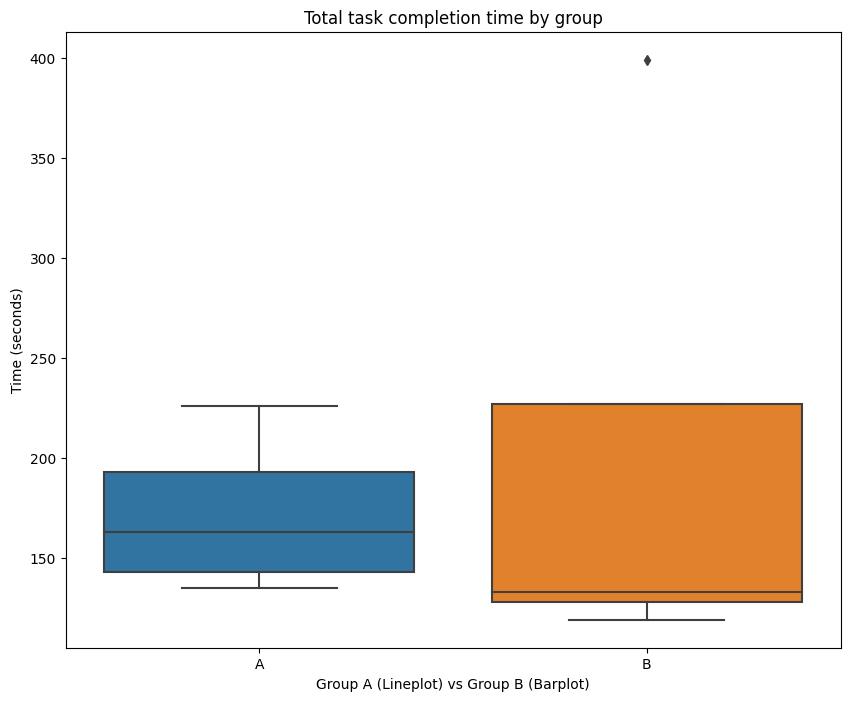

In [8]:
# Boxplot

sns.boxplot(x='Group ', y='weighted_score', data=df_weight)
plt.title('Total task completion time by group')
plt.xlabel('Group A (Lineplot) vs Group B (Barplot)')
plt.ylabel('Time (seconds)')
plt.show()


Feedback 
